# LIBRERIAS


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#**ETL**

##ABRIR

In [4]:
file_path = 'farmaceutica_db_2025.csv'
base = pd.read_csv(file_path)

## VALIDAR COLUMNAS




In [5]:
COLUMNAS_REQUERIDAS = ['codigo_cliente', 'nombre_cliente', 'codigo_producto', 'nombre_producto', 'fecha_venta', 'cantidad', 'precio_unitario', 'total_venta']
ARCHIVOS_OMITIDOS = []
CSV_VALIDOS = []

# Validar el unico DataFrame 'base'
if not all(col in base.columns for col in COLUMNAS_REQUERIDAS):
    ARCHIVOS_OMITIDOS.append(file_path) # Agregar el unico archivo si no cumple los requisitos
else:
    CSV_VALIDOS.append(base)

# Si el unico archivo fue omitido, detener el procesamiento o manejar adecuadamente
if not CSV_VALIDOS:
    print(f"El archivo {file_path} fue omitido debido a que faltan columnas requeridas.")
    # Puedes agregar mas manejo de errores o detener la ejecucion aqui

## TRANSFORMAR DATA


In [6]:
# Aplicar transformaciones si el archivo fue valido
if CSV_VALIDOS:
    df = CSV_VALIDOS[0] # Obtener el unico DataFrame

    # Convertir columnas a string
    df['codigo_cliente'] = df['codigo_cliente'].astype(str)
    df['nombre_cliente'] = df['nombre_cliente'].astype(str)
    df['codigo_producto'] = df['codigo_producto'].astype(str)
    df['nombre_producto'] = df['nombre_producto'].astype(str)

    # Convertir columnas a fecha
    df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], format='%Y-%m-%d', errors='coerce')

    # Convertir columnas a int
    df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce').fillna(0).astype(int)

    # Convertir columna a float
    df['precio_unitario'] = pd.to_numeric(df['precio_unitario'], errors='coerce').fillna(0.0)
    df['total_venta'] = pd.to_numeric(df['total_venta'], errors='coerce').fillna(0.0)

    # Rellenar null categoricos y numericos
    for col in ['codigo_cliente', 'nombre_cliente', 'codigo_producto', 'nombre_producto']:
        df[col] = df[col].fillna("DESCONOCIDO")

    for col in ['cantidad', 'precio_unitario', 'total_venta']:
        df[col] = df[col].fillna(0)

    # Asignar el dataframe procesado a 'data'
    data = df.copy()
else:
    # Manejar el caso en que el archivo fue omitido
    data = pd.DataFrame() # Crear un DataFrame vacio si no se cargo data valida

## RESULTADO



In [7]:
print(f"Total de archivos procesados: 1")
print(f"Numero de archivos omitidos: {len(ARCHIVOS_OMITIDOS)}")
if ARCHIVOS_OMITIDOS:
    print("Archivo omitido:")
    for nombre_archivo in ARCHIVOS_OMITIDOS:
        print(f"- {nombre_archivo}")

print("\nDataFrame final (data):")
if not data.empty:
    display(data.head())
else:
    print("No se pudo cargar un DataFrame válido.")

Total de archivos procesados: 1
Numero de archivos omitidos: 0

DataFrame final (data):


,codigo_cliente,nombre_cliente,codigo_producto,nombre_producto,fecha_venta,cantidad,precio_unitario,total_venta
0,C001,Maria Garcia Rodriguez,P253,Ibuprofeno 250mg Capsula,2025-03-20,8,13.01,104.08
1,C113,Alberto Tenorio Torrijos,P186,Diclofenaco 20mg Crema,2025-07-18,19,14.83,281.77
2,C107,Celia Bauza Amoros,P197,Diclofenaco 100mg Capsula,2025-10-17,17,35.78,608.26
3,C097,Eutimio Maestre Aroca,P010,Levotiroxina 100mcg,2025-12-16,19,18.22,346.18
4,C094,Azahar Banos Mateos,P066,Loratadina/Pseudoefedrina,2025-09-02,4,5.89,23.56


# ANALISIS - CLIENTES X VENTAS

In [8]:
df = pd.read_csv('/content/farmaceutica_db_2025.csv')

In [9]:
display(df.describe())
display(df.info())

,cantidad,precio_unitario,total_venta
count,300.000000,300.000000,300.000000
mean,10.223333,27.048033,278.138767
std,5.389212,13.296902,213.157847
min,1.000000,3.400000,3.880000
25%,6.000000,16.525000,113.047500
50%,10.000000,26.670000,225.390000
75%,14.000000,38.847500,385.220000
max,20.000000,49.860000,985.200000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigo_cliente   300 non-null    object 
 1   nombre_cliente   300 non-null    object 
 2   codigo_producto  300 non-null    object 
 3   nombre_producto  300 non-null    object 
 4   fecha_venta      300 non-null    object 
 5   cantidad         300 non-null    int64  
 6   precio_unitario  300 non-null    float64
 7   total_venta      300 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 18.9+ KB


None

In [10]:
clientes = df['codigo_cliente']
freq_clientes = clientes.value_counts()

# GRAFICO 1.1 - CLIENTES X VENTAS

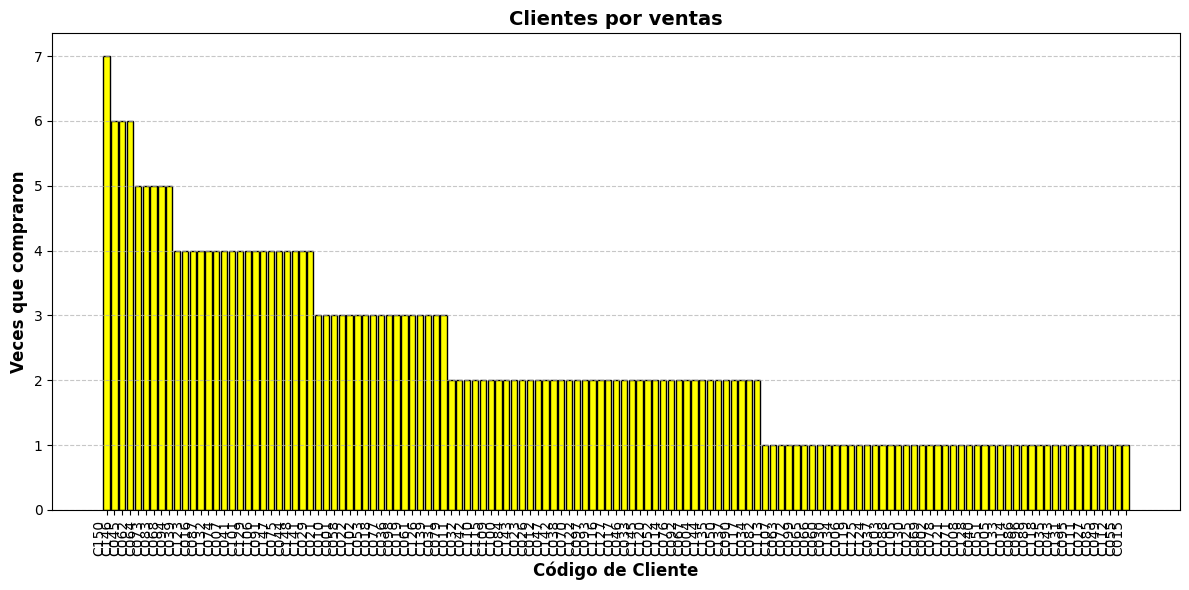

In [11]:
plt.figure(figsize=(12,6))  # un poco más ancho para las etiquetas
plt.bar(
    freq_clientes.index,
    freq_clientes.values,
    width=0.8,
    edgecolor='black',       # borde negro en cada barra
    color='yellow'
)

# Etiquetas del eje X
plt.xlabel('Código de Cliente', fontsize=12, weight='bold')
plt.xticks(rotation=90, fontsize=10, ha='right')  # rotación + alineación derecha
plt.ylabel('Veces que compraron', fontsize=12, weight='bold')
plt.title('Clientes por ventas', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# ANALISIS - TOP 10 PRODUCTOS MAS VENDIDOS 💰

In [12]:
# Productos más vendidos
productos_mas_vendidos = (
    df.groupby('nombre_producto')['cantidad']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# ANALISIS - VENTAS  ✖  MES

In [13]:
# Ventas por mes
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])
df['mes'] = df['fecha_venta'].dt.month
ventas_por_mes = (
    df.groupby('mes')['total_venta']
    .sum()
    .sort_values(ascending=False)
)

# ANALISIS - TEMPORADA (MES) CON MAS VENTAS

In [14]:

# Temporadas altas y bajas
mes_alto = ventas_por_mes.idxmax()
mes_bajo = ventas_por_mes.idxmin()

print(" Top 10 productos más vendidos:")
print(productos_mas_vendidos)
print("\n========Ventas totales por mes:================================================================")
print(ventas_por_mes)
print("=================================================================================================")
print(f"\n*** Temporada alta: el mes en que se reflejan mayor ventas es en el mes # {mes_alto} ***")
print(f"*** Temporada baja: el mes en que se reflejan menos ventas es en el mes # {mes_bajo}  ***")
print("=================================================================================================")


 Top 10 productos más vendidos:
nombre_producto
Cetirizina 1g Tableta          64
Ibuprofeno 250mg Jarabe        56
Ciprofloxacino 500mg           53
Omeprazol 100mg Tableta        51
Levotiroxina 100mcg            46
Metronidazol 500mg             46
Diclofenaco 200mg Inyeccion    45
Metformina 250mg Jarabe        44
Diclofenaco 100mg Capsula      42
Alprazolam 0.5mg               40
Name: cantidad, dtype: int64

========Ventas totales por mes:================================================================
mes
12    10805.00
10     8611.41
4      8486.62
5      7356.60
2      7152.81
8      7127.91
11     6427.43
3      6165.88
9      5777.32
7      5445.08
1      5299.49
6      4786.08
Name: total_venta, dtype: float64

*** Temporada alta: el mes en que se reflejan mayor ventas es en el mes # 12 ***
*** Temporada baja: el mes en que se reflejan menos ventas es en el mes # 6  ***


#GRAFICO 1.1 -  PRODUCTOS MAS VENDIDOS


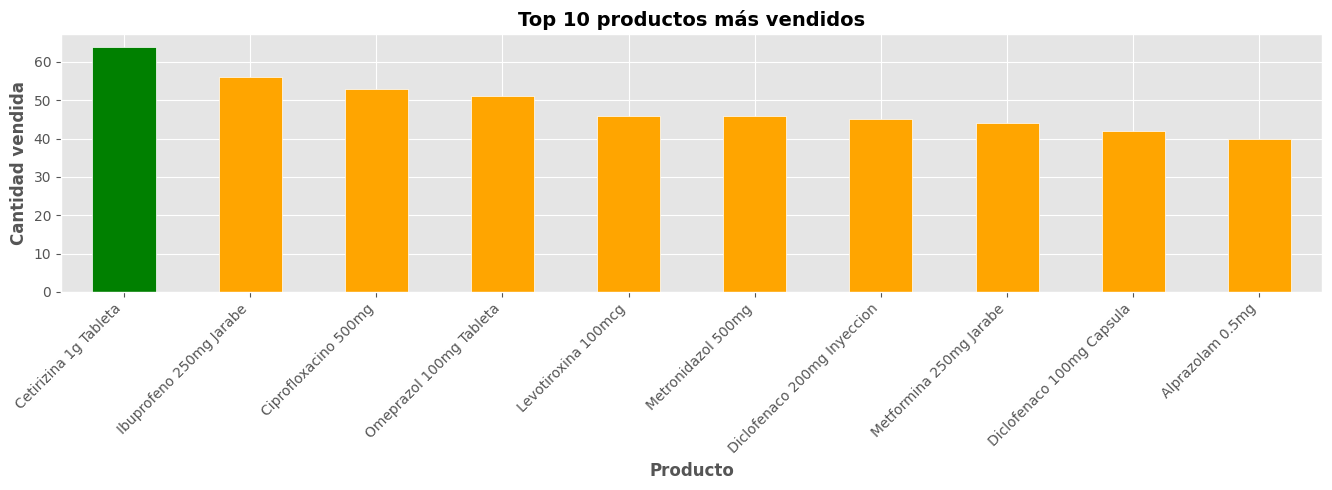

In [15]:
#  Gráfico 1: Productos más vendidos
plt.style.use('ggplot')
plt.figure(figsize=(13.5,5))

# Definir colores según el promedio de la cantidad vendida en el ano fiscal
colores = []
for val in productos_mas_vendidos:
    if val < productos_mas_vendidos.mean() * 0.7:  # bajo
        colores.append('red')
    elif val < productos_mas_vendidos.mean() * 1.3:  # medio
        colores.append('orange')
    else:  # alto
        colores.append('green')

 #damos mas personalidad a nuestro grafica

productos_mas_vendidos.plot(
    kind='bar',
    color=colores,
    edgecolor='white'  # borde negro
)

plt.title('Top 10 productos más vendidos', fontsize=14, weight='bold')
plt.xlabel('Producto', fontsize=12, weight='bold')
plt.ylabel('Cantidad vendida', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()



#GRAFICO 1.2 -  PRODUCTOS MAS VENDIDOS





In [16]:
# AQUI CREAMOS UN GRAFICO TIPO PLOTLY EJE EJE X (producto vendido)  / Y (cantidad vendida)
fig = px.bar(
    productos_mas_vendidos,
    x=productos_mas_vendidos.index,
    y=productos_mas_vendidos.values,
    labels={'x': 'Producto', 'y': 'Cantidad vendida'},
    title='Top 10 productos mas vendidos',
    color=productos_mas_vendidos.values, # USAMOS LOS VALORES PARA EL COLOREADO
    color_continuous_scale=px.colors.sequential.Viridis # HACE UN GRADIENTE AUTOMATICO PERO SE PUEDE CAMBIAR
)

# PERSOANLIZACION DE LA ESTRUCTURA WEB
fig.update_layout(
    xaxis_title='Producto',
    yaxis_title='Cantidad vendida',
    title_font_size=16,
    xaxis_tickangle=-45 # ESTA LINEA ROTA EL EJE X PARA MAYOR LEGIBILIDAD
)

fig.show()

#GRAFICO 1.1 -  MES MAS CALIENTE EN VENTAS


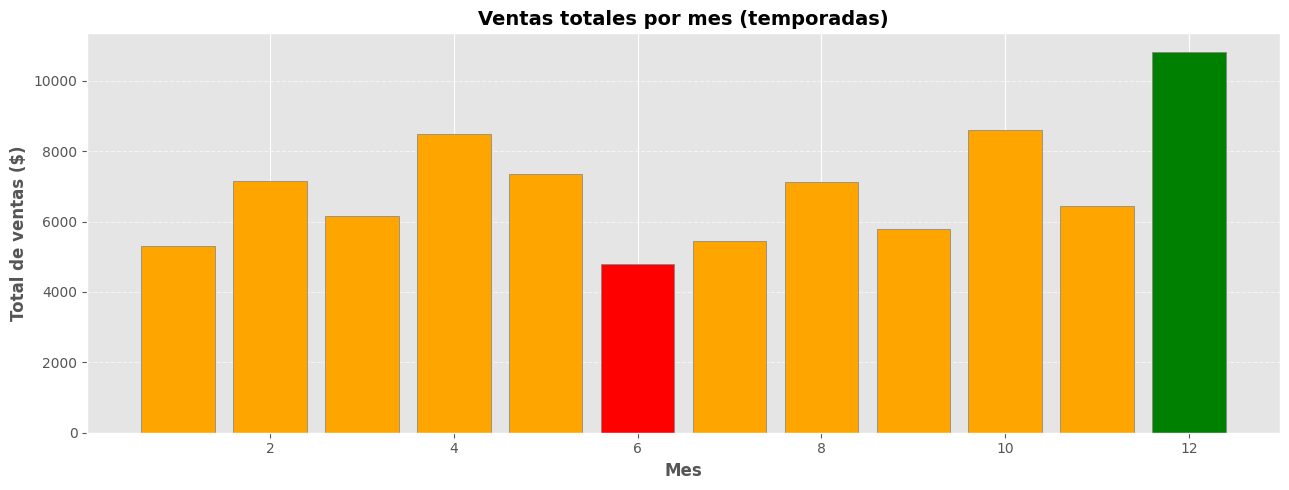

In [17]:

#  Gráfico 2: Ventas por mes
plt.style.use('ggplot')
plt.figure(figsize=(13,5))

#calculamos el promedio de ventas ganadas por mes

colores_mes = []
for val in ventas_por_mes.sort_index():
    if val < ventas_por_mes.mean() * 0.7:  # bajo
        colores_mes.append('red')
    elif val < ventas_por_mes.mean() * 1.3:  # medio
        colores_mes.append('orange')
    else:  # alto
        colores_mes.append('green')

plt.bar(
    ventas_por_mes.sort_index().index,
    ventas_por_mes.sort_index().values,
    color=colores_mes,
    edgecolor='grey'
)

plt.title('Ventas totales por mes (temporadas)', fontsize=14, weight='bold')
plt.xlabel('Mes', fontsize=12, weight='bold')
plt.ylabel('Total de ventas ($)', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ANALISIS - RFM (Recencia, Frecuencia, Valor Monetario)

In [18]:
#Segmentacion por patrones de compras
!pip install -q plotly jupyter-dash

try:
    df
except NameError:
    df = pd.read_csv('/content/sample_data/farmaceutica_db_2025.csv')

# Columnas esperadas
expected_cols = {
    'codigo_cliente','nombre_cliente','codigo_producto','nombre_producto',
    'fecha_venta','cantidad','precio_unitario','total_venta'
}
missing = expected_cols - set(df.columns)
assert not missing, f"Faltan columnas en el CSV: {missing}"

# Tipos y normalización mínima
df = df.copy()
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce').fillna(0)
df['precio_unitario'] = pd.to_numeric(df['precio_unitario'], errors='coerce').fillna(0.0)
df['total_venta'] = pd.to_numeric(df['total_venta'], errors='coerce')
# Si total_venta viene vacío, lo recalculamos
mask_tv = df['total_venta'].isna()
df.loc[mask_tv, 'total_venta'] = df.loc[mask_tv, 'cantidad'] * df.loc[mask_tv, 'precio_unitario']

assert df['fecha_venta'].notna().all(), "Hay fechas nulas; revisa el CSV de origen."

#Segmentacion
from datetime import datetime

cutoff = df['fecha_venta'].max()
g = df.groupby('codigo_cliente')

# Métricas RFM
recencia  = (cutoff - g['fecha_venta'].max()).dt.days.rename('Recency')
frecuencia = g['codigo_producto'].count().rename('frecuencia')
ingresos  = g['total_venta'].sum().rename('ingresos')

rfm = pd.concat([recencia, frecuencia, ingresos], axis=1).reset_index()

# Función robusta de cuantiles (maneja empates)
def qscore(series, q=5, invert=False):
    r = series.rank(method='first')
    if invert: r = -r
    k = max(2, min(q, int(r.nunique())))
    return pd.qcut(r, q=k, labels=list(range(1, k+1)), duplicates='drop').astype(int)

rfm['R_score'] = qscore(rfm['Recency'], invert=True)
rfm['F_score'] = qscore(rfm['frecuencia'])
rfm['M_score'] = qscore(rfm['ingresos'])

# Reglas de segmento
def tag_segment(row):
    r,f,m = row['R_score'], row['F_score'], row['M_score']
    if r==rfm['R_score'].max() and f>=4 and m>=4: return 'Champions'
    if f>=4 and m>=3:  return 'Leales'
    if r<=2 and (f>=3 or m>=3): return 'En riesgo'
    if r<=2 and f<=2: return 'A recuperar'
    return 'Prometedores'

rfm['Segmento'] = rfm.apply(tag_segment, axis=1)

# Rasgos adicionales
breadth = g['codigo_producto'].nunique().rename('breadth_productos')
aov     = (ingresos / frecuencia).rename('AOV') #Valor Promedio del Pedido se consigue diviendo vlaor moneteario entre frecuencia es el promdio de lo que gasta cada vez que gasta

def interpurchase_days(s): #diferencia entre dias que dura para comprar
    s = s.sort_values().diff().dt.days.dropna()
    return s.median() if len(s) else np.nan

inter   = g['fecha_venta'].apply(interpurchase_days).rename('dias_intercompra_med')
dow     = g['fecha_venta'].apply(lambda s: s.dt.day_name().mode().iat[0] if len(s)>0 else np.nan).rename('dia_pref')

feats = pd.concat([breadth, aov, inter, dow], axis=1).reset_index()

segments = rfm.merge(feats, on='codigo_cliente', how='left')
segments.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.7 MB/s eta 0:00:00


,codigo_cliente,Recency,frecuencia,ingresos,R_score,F_score,M_score,Segmento,breadth_productos,AOV,dias_intercompra_med,dia_pref
0,C001,1,3,711.53,5,4,4,Champions,3,237.176667,153.5,Monday
1,C002,335,1,222.36,1,1,1,A recuperar,1,222.360000,NaN,Wednesday
2,C004,136,2,514.69,3,2,3,Prometedores,2,257.345000,61.0,Monday
3,C005,83,1,506.60,3,1,3,Prometedores,1,506.600000,NaN,Wednesday
4,C006,117,1,386.20,3,1,2,Prometedores,1,386.200000,NaN,Thursday


In [19]:
#Interactivos
import plotly.express as px

# 1) Distribución de clientes por segmento
segment_counts = segments['Segmento'].value_counts().reset_index()
segment_counts.columns = ['Segmento', 'count'] # RENOMBRAMOS LAS COLUMANS
fig1 = px.bar(
    segment_counts,
    x='Segmento', y='count',
    labels={'Segmento':'Segmento','count':'Clientes'},
    title='Distribución de clientes por segmento'
)

# 2) Dispersión Frequency vs Monetary coloreado por segmento
fig2 = px.scatter(
    segments, x='frecuencia', y='ingresos',
    size='ingresos', color='Segmento',
    hover_data=['codigo_cliente'],
    title='Patrones de compra por cliente'
)

# 3) Heatmap R-F coloreado por gasto (mediana Monetary)
rfm_pivot = segments.pivot_table(index='R_score', columns='F_score', values='ingresos', aggfunc='median')
fig3 = px.imshow(rfm_pivot, text_auto=True, aspect='auto',
                 title='Mapa de Calor (color = mediana de ingresos)')
fig3.update_layout(xaxis_title='F_score', yaxis_title='R_score')

# 4) Ventas mensuales con filtro de segmento (input simple)
ventas = df.copy()
ventas['mes'] = ventas['fecha_venta'].dt.to_period('M').dt.to_timestamp()
ventas = ventas.merge(segments[['codigo_cliente','Segmento']], on='codigo_cliente', how='left')
mens_seg = ventas.groupby(['mes','Segmento'])['total_venta'].sum().reset_index()

# Mostrar todo por defecto; pueden filtrar cambiando el valor de seg_value
seg_value = 'Todos'  # reemplaza por un segmento específico para filtrar
data = mens_seg if seg_value=='Todos' else mens_seg[mens_seg['Segmento']==seg_value]

fig4 = px.line(
    data, x='mes', y='total_venta',
    color=None if seg_value!='Todos' else 'Segmento',
    markers=True, title=f'Ventas mensuales ({seg_value})'
)
fig4.update_layout(xaxis_title='Mes', yaxis_title='Ventas')

#Mini_Dashboard

from dash import Dash, html, dcc, Input, Output # importqmos desde jupyte_dash
import plotly.express as px

opciones = ['Todos'] + sorted(segments['Segmento'].dropna().unique().tolist())

app = Dash(__name__) # Creamos nuestra App WEb con plotly desde la libreria JupyterDash
app.layout = html.Div([
    html.H2("Clientes & Segmentos – Farmacéutica"),
    html.Div([
        html.Label("Filtrar segmento:"),
        dcc.Dropdown(
            options=[{"label":s, "value":s} for s in opciones],
            value="Todos", id="seg-dd", clearable=False
        )
    ], style={"width":"320px"}),

    dcc.Graph(id="bar-seg"),
    dcc.Graph(id="scatter-fm"),
    dcc.Graph(id="heat-rf"),
    dcc.Graph(id="line-mens"),
])

@app.callback(
    Output("bar-seg","figure"),
    Output("scatter-fm","figure"),
    Output("heat-rf","figure"),
    Output("line-mens","figure"),
    Input("seg-dd","value")
)
def update_all(seg_value):
    segment_counts = segments['Segmento'].value_counts().reset_index()
    segment_counts.columns = ['Segmento', 'count'] # renombramos las columnas
    fig_bar = px.bar(
        segment_counts,
        x='Segmento', y='count',
        labels={'Segmento':'Segmento','count':'Clientes'},
        title='Distribución de clientes por segmento'
    )
    seg_df = segments if seg_value=='Todos' else segments[segments['Segmento']==seg_value]
    fig_sc = px.scatter(seg_df, x='frecuencia', y='ingresos', color='Segmento',
                        size='ingresos', hover_data=['codigo_cliente'],
                        title=f'Patrones de compra ({seg_value})')
    piv = segments.pivot_table(index='R_score', columns='F_score', values='ingresos', aggfunc='median')
    fig_hm = px.imshow(piv, text_auto=True, aspect='auto', title='Mapa de Calor (mediana ingresos)')

    data = mens_seg if seg_value=='Todos' else mens_seg[mens_seg['Segmento']==seg_value]
    fig_line = px.line(data, x='mes', y='total_venta',
                       color=None if seg_value!='Todos' else 'Segmento',
                       markers=True, title=f'Ventas mensuales ({seg_value})')
    fig_line.update_layout(xaxis_title='Mes', yaxis_title='Ventas')
    return fig_bar, fig_sc, fig_hm, fig_line

if __name__ == '__main__': # LA APP WEB DE PLOTLY EN ESTE CASO EL DASH IMPLEMENTADO SE CORRE EL PUERTO PREDETERMINADO 8050 PERO
    app.run(debug=True, mode="inline", port=8052) # PERO EN ESTE CASO CON ESTA CONDICIONAL CORRERA EN 8052 POR SI OTRA APP WEB DE JUOYTERDASH UTILIZA ES PUERTO

<IPython.core.display.Javascript object>